# Quality control Patient_Timpoint

In [62]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

import rpy2.rinterface_lib.callbacks
import logging
import anndata2ri

# Automatically convert rpy2 outputs to pandas dataframes
#pandas2ri.activate()
anndata2ri.activate()

plt.rcParams['figure.figsize']=(5,5) #rescale figures
sc.settings.verbosity = 3
sc.logging.print_versions()

# Work with R
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython


-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.1
-----
PIL                 8.2.0
anndata             0.7.6
anndata2ri          1.0.6
attr                20.3.0
backcall            0.2.0
cached_property     1.5.2
cffi                1.14.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
get_version         2.2
h5py                3.2.1
idna                2.10
igraph              0.9.1
ipykernel           5.5.3
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
jsonschema          3.2.0
kiwisolver          1.3.1
legacy_api_wrap     1.2
leidenalg           0.8.4
llvmlite            0.36.0
markupsafe          1.1.1
matplotlib          3.4.1
mpl_toolkits        NA
natsort             7.1.1
nbformat            5.1.3
numba               0.53.1
numexpr             2.7.3
numpy               1.20.2
packaging           20.9
pandas              1.2.4
pa

## Cellranger output

In [ ]:
#read in python
adata = sc.read_10x_mtx('/data/Patient/Patient_Timepoint/outs/filtered_feature_bc_matrix', cache=True)
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['n_genes'] = (adata.X > 0).sum(1)
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
adata

... storing 'feature_types' as categorical


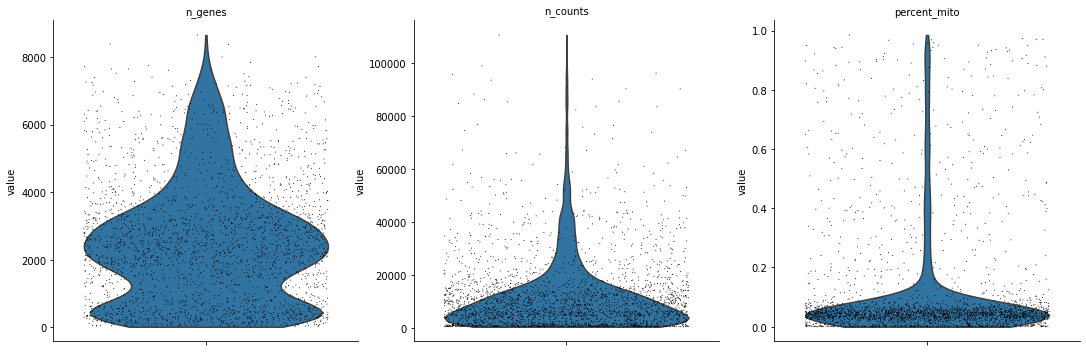

In [67]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.4, multi_panel=True)

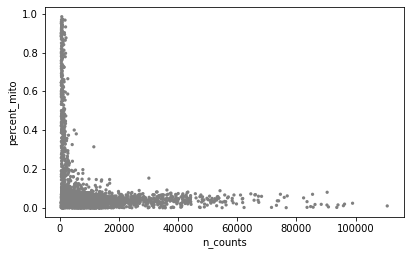

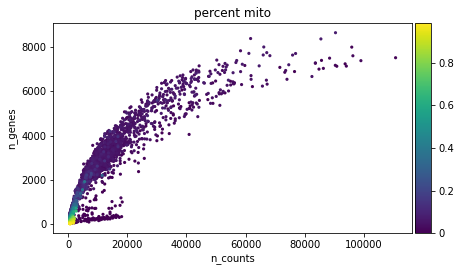

In [69]:
plt.rcParams['figure.figsize']=(6,4)
sc.pl.scatter(adata, 'n_counts', 'percent_mito')
sc.pl.scatter(adata, 'n_counts', 'n_genes',  color='percent_mito', size = 40)

### Counts

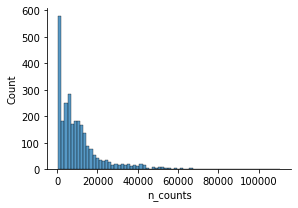

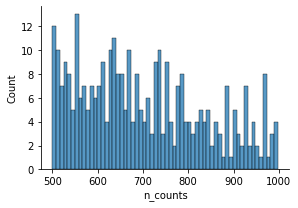

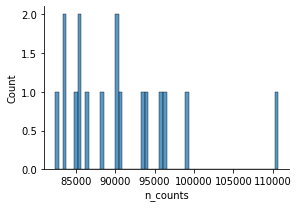

In [71]:
p3 = sb.displot(adata.obs['n_counts'], kde=False, height=3, aspect=11.7/8.27)
plt.show()
p4 = sb.displot(adata.obs['n_counts'][adata.obs['n_counts']<1000], kde=False, bins=60, height=3, aspect=11.7/8.27)
plt.show()
p5 = sb.displot(adata.obs['n_counts'][adata.obs['n_counts']>80000], kde=False, bins=60, height=3, aspect=11.7/8.27)
plt.show()

In [73]:
adata2 = adata[(adata.obs['n_counts'] > 0) & (adata.obs['n_counts'] < 80000)]
adata2

View of AnnData object with n_obs × n_vars = 2803 × 36601
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types'

No cells with few counts, excluded 17 potential doublets.

### Mitochondrial percentage

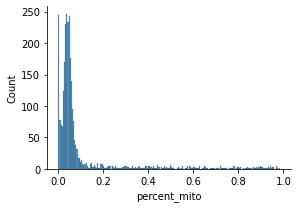

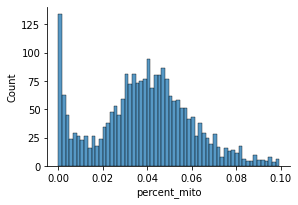

In [75]:
sb.displot(adata2.obs['percent_mito'], kde=False, height=3, aspect=11.7/8.27)
sb.displot(adata2.obs['percent_mito'][adata2.obs['percent_mito']<0.1], kde=False, bins=60, height=3, aspect=11.7/8.27)

Are those cells with mitochondrial percentage close to 0 red blood cells?

/home/ajordano/software/anaconda3/envs/scRNA_pre_process/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


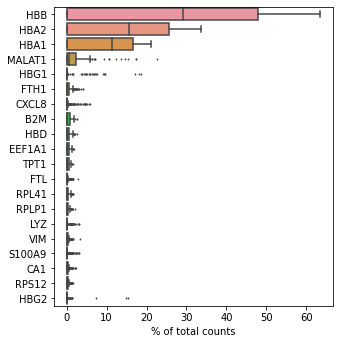

In [76]:
adataed = adata2[(adata2.obs['percent_mito'] < 0.005)]
sc.pl.highest_expr_genes(adataed, n_top=20, )

In [77]:
adata3 = adata2[(adata2.obs['percent_mito'] < 0.5)]
adata3

View of AnnData object with n_obs × n_vars = 2629 × 36601
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types'

Yes, cells with very low percentage of mito genes are red blood cells. Excluded 174 cells with more than 50% mito genes.

### Genes

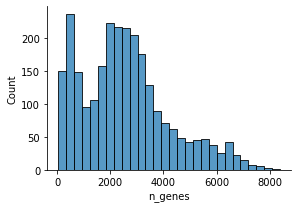

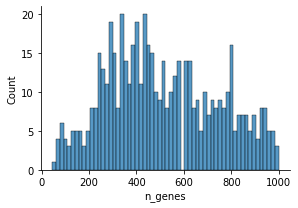

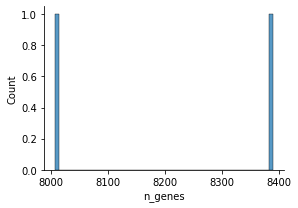

In [79]:
p3 = sb.displot(adata3.obs['n_genes'], kde=False, height=3, aspect=11.7/8.27)
plt.show()
p4 = sb.displot(adata3.obs['n_genes'][adata3.obs['n_genes']<1000], kde=False, bins=60, height=3, aspect=11.7/8.27)
plt.show()
p5 = sb.displot(adata3.obs['n_genes'][adata3.obs['n_genes']>8000], kde=False, bins=60, height=3, aspect=11.7/8.27)
plt.show()

Are cells with less than 200 genes red blood cells?

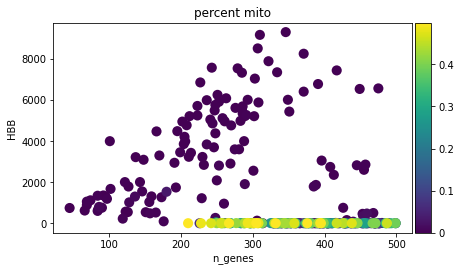

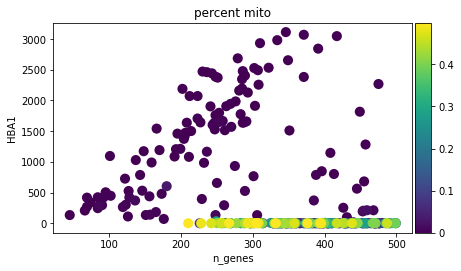

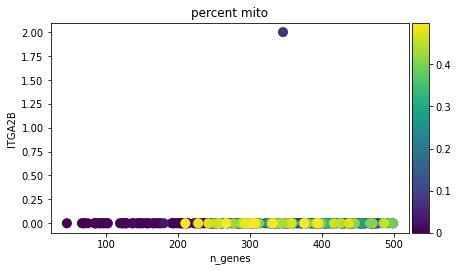

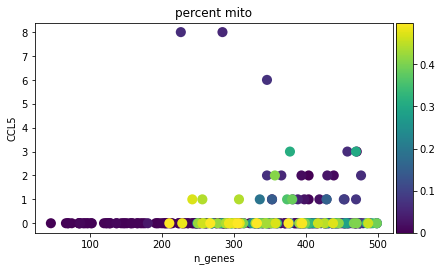

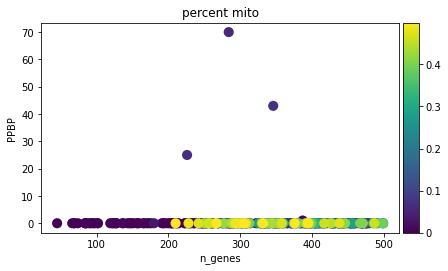

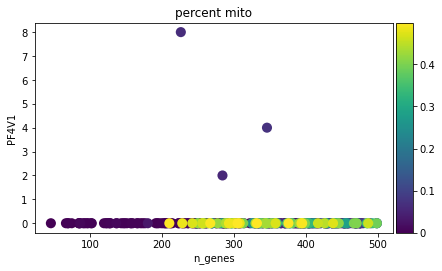

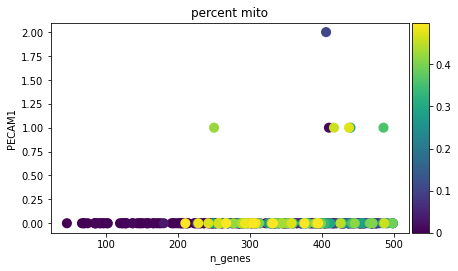

In [81]:
adata4 = adata3[adata3.obs['n_genes'] < 500]
plt.rcParams['figure.figsize']=(6,4)
#test for red blood cells
sc.pl.scatter(adata4, 'n_genes', 'HBB', color='percent_mito')
sc.pl.scatter(adata4, 'n_genes', 'HBA1', color='percent_mito')

#test for platelets inactivated
sc.pl.scatter(adata4, 'n_genes', 'ITGA2B', color='percent_mito')
sc.pl.scatter(adata4, 'n_genes', 'CCL5', color='percent_mito') 
sc.pl.scatter(adata4, 'n_genes', 'PPBP', color='percent_mito') 
sc.pl.scatter(adata4, 'n_genes', 'PF4V1', color='percent_mito') 
sc.pl.scatter(adata4, 'n_genes', 'PECAM1', color='percent_mito')

Cells with less than 200 genes are red blood cells. Didn't exclude any cells due to number of genes.

## After filtering

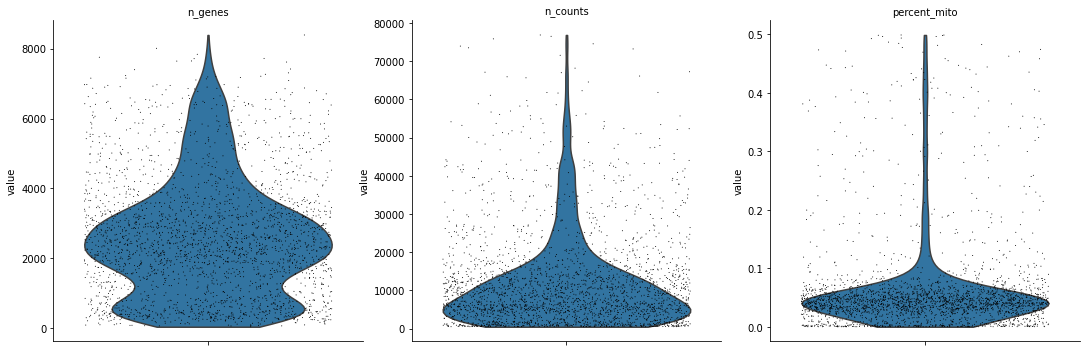

In [82]:
sc.pl.violin(adata3, ['n_genes', 'n_counts', 'percent_mito'], jitter=0.4, multi_panel=True)

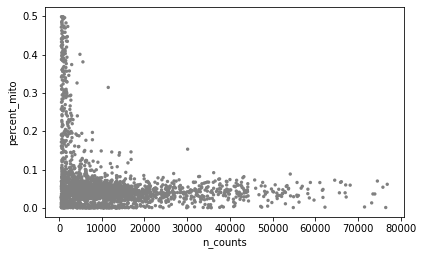

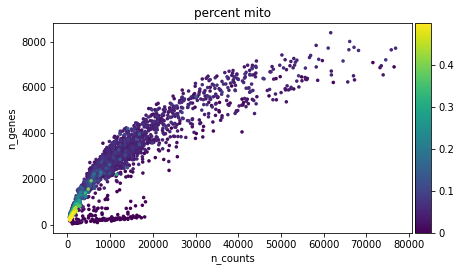

In [84]:
plt.rcParams['figure.figsize']=(6,4)
sc.pl.scatter(adata3, 'n_counts', 'percent_mito')
sc.pl.scatter(adata3, 'n_counts', 'n_genes',  color='percent_mito', size = 50)

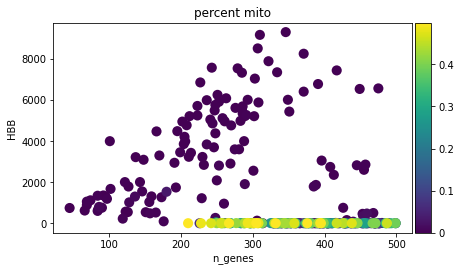

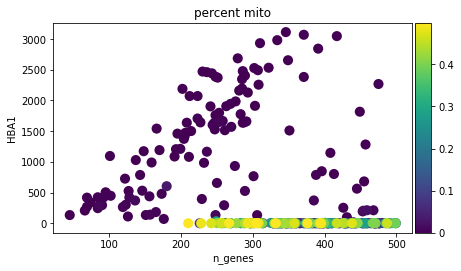

In [85]:
#test for red blood cells
sc.pl.scatter(adata4, 'n_genes', 'HBB', color='percent_mito')
sc.pl.scatter(adata4, 'n_genes', 'HBA1', color='percent_mito')

In [86]:
ngenes = np.mean(adata3.obs['n_genes'])
ngenes

2564.683529859262

In [87]:
adata_final = adata3
adata_final

View of AnnData object with n_obs × n_vars = 2629 × 36601
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types'

### Check clustering of cells

In [88]:
adata_final = adata_final[(adata_final.obs['percent_mito'] < 0.3)]
adata_final

View of AnnData object with n_obs × n_vars = 2525 × 36601
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'feature_types'

In [89]:
ngenes = np.mean(adata_final.obs['n_genes'])
ngenes

2649.5885148514853

### Conclusion

Excluded 17 potential doublets according to the number of counts, kept all red blood cells that caused a pick close to 0 percercent of mitochondrial genes, there were no empty droplets, most cells excluded were stressed or dying with percetage of mitochondrial genes higher than 50% (174). Scatter and violin plot good! Excluded 104 cells that were forming a cluster with mito genes highly expressed.

### Save file

In [90]:
adata_final.write("/data/cellrangerDatasets/Patient_Timepoint_cr.h5ad")

### Checking markers and genes to see if I need to exclude anyone else.

| Marker        | Cell type     |
| ------------- | ------------- |
| HBA1      | Erythrocytes |
| CD34      | Stem cells  |
| CD33 | Myeloid cells  |
| S100A8 | Monocytes |
| FCER1A | Dendritic cells |
| CD3E | T cells |
| KLRB1 | NK cells |
| MS4A1 | B cells |

/home/ajordano/software/anaconda3/envs/scRNA_pre_process/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
filtered out 18252 genes that are detected in less than 5 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=25
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordin

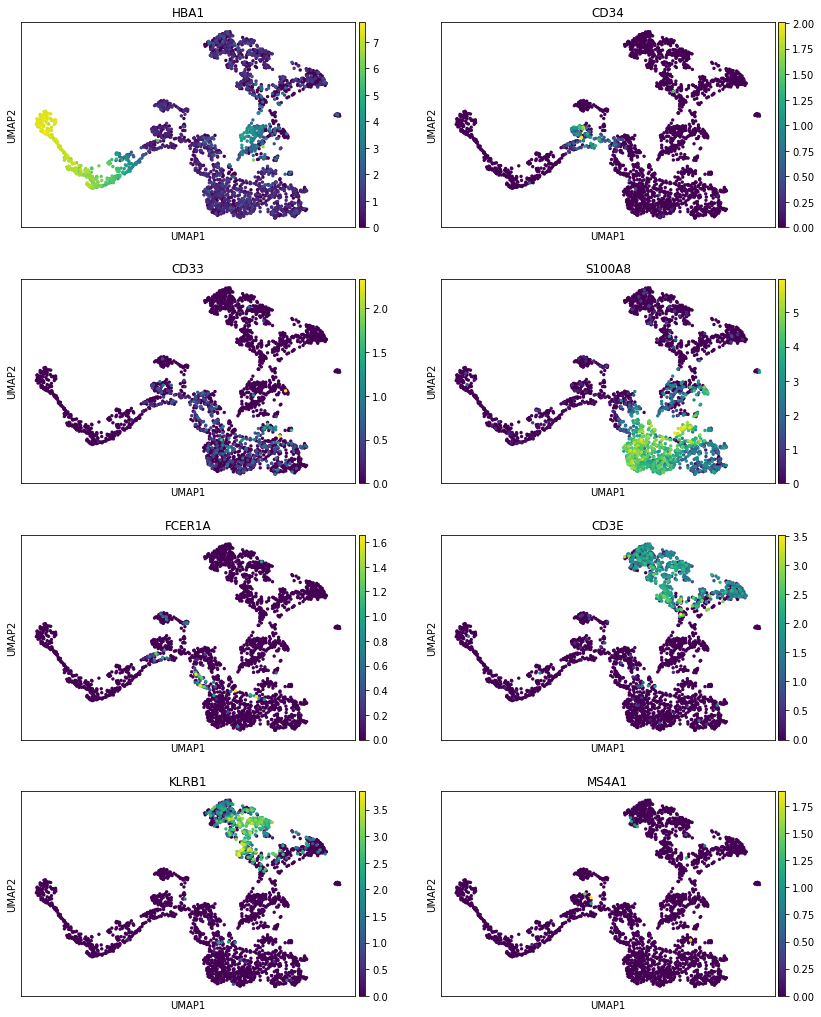

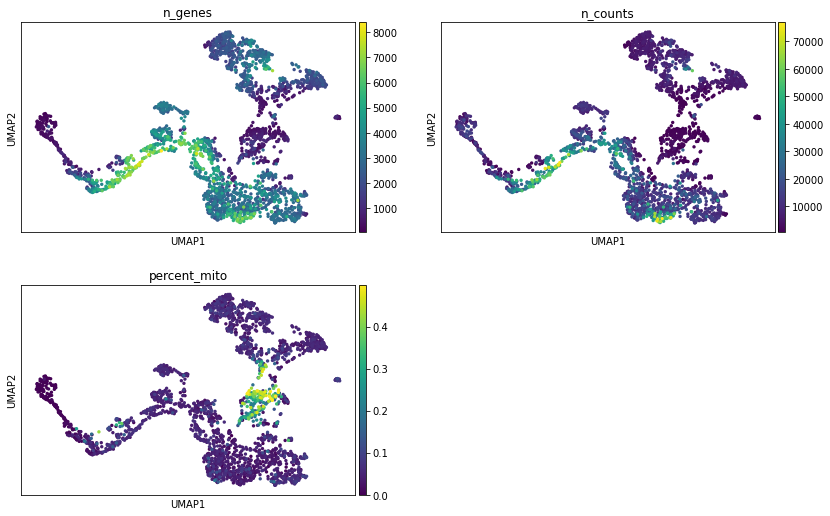

In [91]:
sc.pp.normalize_total(adata3) # normalise
sc.pp.log1p(adata3) # log transform
sc.pp.filter_genes(adata3, min_cells = 5) # filter out genes expressed in < 5 cells
sc.pp.highly_variable_genes(adata3, flavor='cell_ranger', n_top_genes=4000) # get top 4000 HVGs
sc.pp.pca(adata3, n_comps=25, use_highly_variable=True, svd_solver='arpack') # pca
sc.pp.neighbors(adata3) # knn
sc.tl.umap(adata3) # umap
sc.pl.umap(adata3, color=['HBA1', 'CD34', 'CD33', 'S100A8', 'FCER1A', 'CD3E', 'KLRB1', 'MS4A1'], ncols=2)
sc.pl.umap(adata3, color=['n_genes', 'n_counts', 'percent_mito'], ncols=2)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


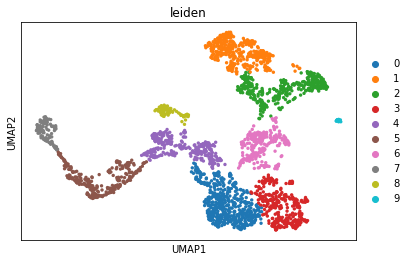

In [92]:
sc.tl.leiden(adata3, resolution=0.2) # cluster with low resolution
sc.pl.umap(adata3, color='leiden')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


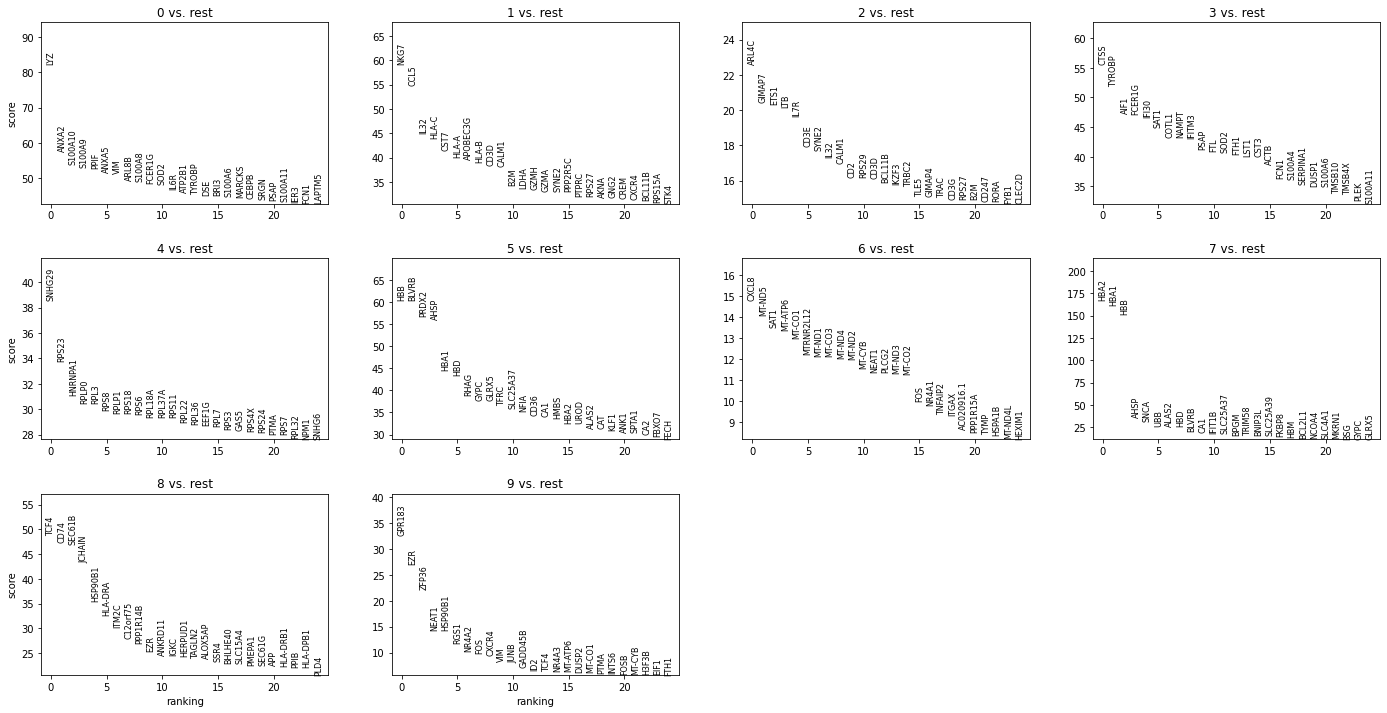

In [93]:
sc.tl.rank_genes_groups(adata3, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata3, n_genes=25, sharey=False)

In [94]:
adata4 = adata3[(adata3.obs['percent_mito'] < 0.3)]
adata4

View of AnnData object with n_obs × n_vars = 2525 × 18349
    obs: 'n_counts', 'n_genes', 'percent_mito', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

running Leiden clustering
Trying to set attribute `.obs` of view, copying.
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


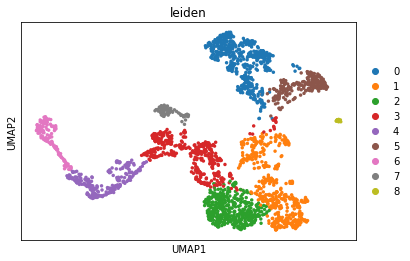

In [95]:
sc.tl.leiden(adata4, resolution=0.2) # cluster with low resolution
sc.pl.umap(adata4, color='leiden')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


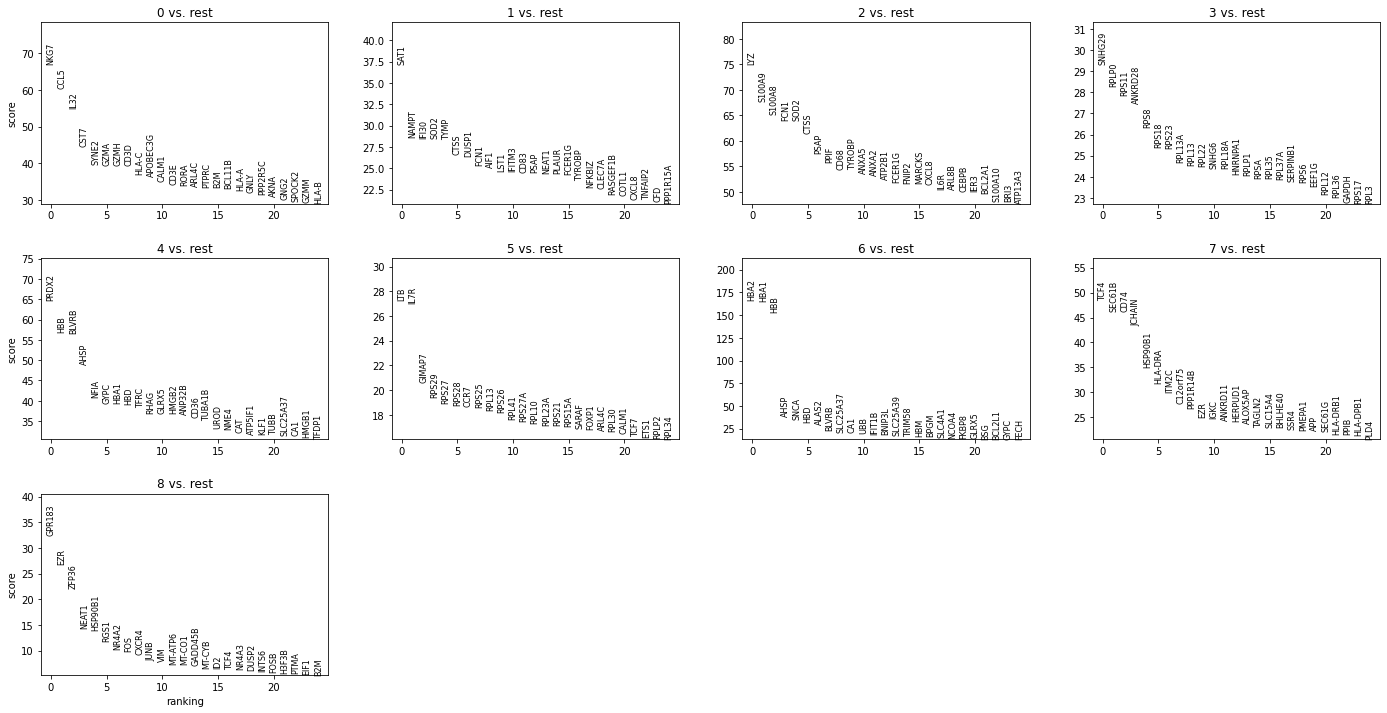

In [96]:
sc.tl.rank_genes_groups(adata4, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata4, n_genes=25, sharey=False)